In [1]:
import piplite
await piplite.install(['pandas', 'matplotlib', 'seaborn', 'numpy'])

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Show first 5 rows
print(df.head())

# Get summary of columns and data types
print(df.info())

# Get statistical summary of numerical columns
print(df.describe())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

In [2]:
# Convert Date column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())

# Add helper columns for analysis
df['Month'] = df['Date'].dt.month_name()
df['Day_of_Week'] = df['Date'].dt.day_name()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [3]:
# Total Revenue by Product Category
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("Sales by Category:\n", category_sales)

# Average Spending by Gender
gender_spend = df.groupby('Gender')['Total Amount'].mean()
print("\nAvg Spend by Gender:\n", gender_spend)

# Most popular products by Quantity
popular_items = df.groupby('Product Category')['Quantity'].sum()

Sales by Category:
 Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

Avg Spend by Gender:
 Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


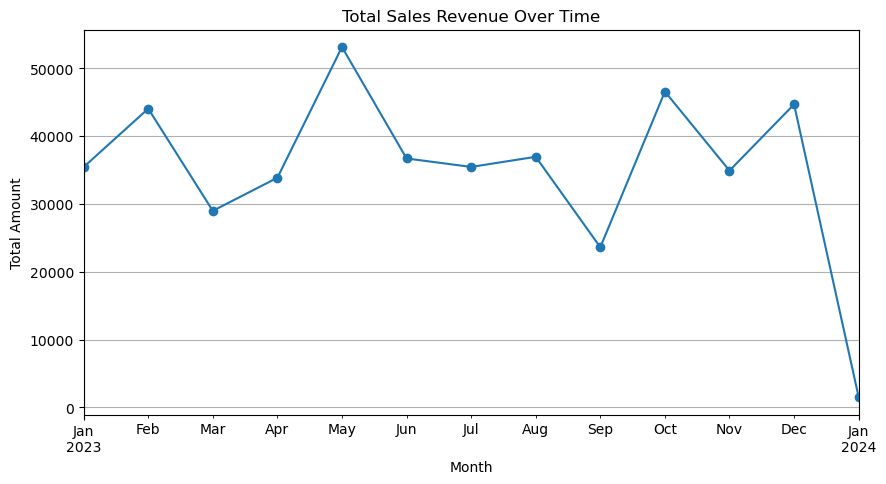

In [4]:
plt.figure(figsize=(10, 5))
df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum().plot(kind='line', marker='o')
plt.title('Total Sales Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

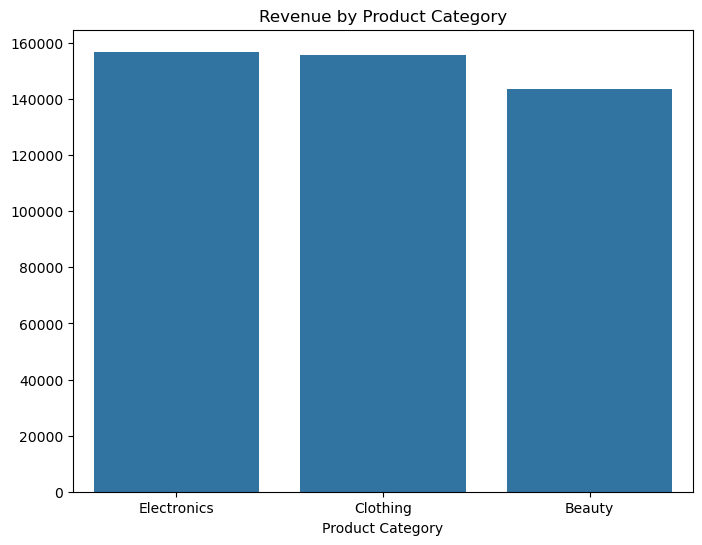

In [5]:
plt.figure(figsize=(8, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Revenue by Product Category')
plt.show()

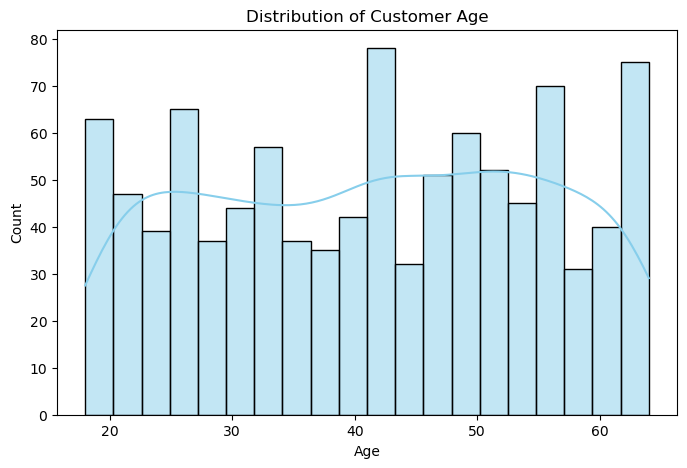

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Customer Age')
plt.show()

In [10]:
# Save the modified dataframe to a new CSV
df.to_csv('cleaned_retail_sales.csv', index=False)

# After running this, 'cleaned_retail_sales.csv' will appear 
# in the file browser on the left for you to download.